In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import xml.etree.ElementTree as ET
# from difflib import SequenceMatcher
import PyPDF2
from lxml import etree
# import Levenshtein

# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
import re

If there is no CSV with the downloaded files, use this:

In [44]:
directory = '../phys'
 
tei_files  = dict()
for filename in os.listdir(directory):
    fid = filename[:-6] # must get rid of version value and extensions
    fid.replace('_', '/')
    if fid not in tei_files:
        tei_files[fid] = 0
    tei_files[fid] = tei_files[fid] + 1
    
phys_papers = pd.read_csv('phys_papers.csv', low_memory=False).query('id in @tei_files').reset_index(drop = True)

In [190]:
cs_papers = pd.read_csv('./papers/downloaded_cs_papers.csv', dtype = {'id': str})

In [8]:
math_papers = pd.read_csv('./papers/downloaded_math_papers.csv', dtype = {'id': str})

In [28]:
cs_papers = pd.read_csv('../final_cs_papers.csv', dtype = {'id': str})

In [55]:
def get_pages_cnt(papers, input_path):
    pages = []
    is_pdf = []

    for index, row in papers.iterrows():
        path = input_path + str(row.id).replace('/', '_') + 'v' + str(row.version) + '.pdf'
        file = open(path, 'rb')
        try:
            readpdf = PyPDF2.PdfFileReader(file, strict=False)
            pages.append(readpdf.numPages)
            is_pdf.append(True)
        except Exception as e:
            print(row.id, ' ', e)
            pages.append(np.nan)
            is_pdf.append(False)
    return pages, is_pdf

In [37]:
def get_delta_pages_cnt(papers):
    delta_pages = []
    for index, row in papers.iterrows():
        if row.version == 1:
            delta_pages.append(np.nan)
            continue
        # elif row.is_pdf == False:
        #     delta_pages.append(-papers.loc[(papers.id == row.id) & (papers.version == row.version - 1)].pages.iloc[0])
        #     continue
        delta = row.pages - papers.loc[(papers.id == row.id) & (papers.version == row.version - 1)].pages
        delta_pages.append(delta.iloc[0])
    return delta_pages

In [56]:
(cs_papers['pages'], cs_papers['is_pdf']) = get_pages_cnt(cs_papers, '../cs/')

0704.1308   EOF marker not found
0707.1099   EOF marker not found
0802.2013   EOF marker not found
0805.1442   EOF marker not found
0807.2648   EOF marker not found
0809.0360   EOF marker not found
0812.2719   EOF marker not found
0901.3929   EOF marker not found
0902.3958   EOF marker not found
0907.3397   EOF marker not found
0908.2905   EOF marker not found
0908.2905   EOF marker not found
0909.3466   EOF marker not found
0910.2443   EOF marker not found
0910.2859   EOF marker not found
0911.1509   EOF marker not found
1001.5183   EOF marker not found
1002.2586   EOF marker not found
1002.3763   EOF marker not found
1003.0588   EOF marker not found
1004.4796   EOF marker not found
1006.3156   EOF marker not found
1007.1229   EOF marker not found
1007.3310   EOF marker not found
1007.4586   EOF marker not found
1009.2556   EOF marker not found
1009.3469   EOF marker not found
1009.5143   EOF marker not found
1010.1069   EOF marker not found
1010.5938   EOF marker not found
1011.3315 

incorrect startxref pointer(1)


1811.04270   EOF marker not found
1811.05056   EOF marker not found
1811.05965   EOF marker not found
1811.06471   EOF marker not found
1811.07698   EOF marker not found
1811.09231   EOF marker not found
1811.09317   EOF marker not found
1811.09393   EOF marker not found
1811.10827   EOF marker not found
1812.04994   EOF marker not found
1812.06325   EOF marker not found
1812.08305   EOF marker not found
1812.09526   EOF marker not found
1812.11481   EOF marker not found
1901.07223   EOF marker not found
1902.02009   EOF marker not found
1902.03855   EOF marker not found
1902.08093   EOF marker not found
1902.09278   EOF marker not found
1902.09334   EOF marker not found
1903.01189   EOF marker not found
1903.01463   EOF marker not found
1903.04240   EOF marker not found
1903.04240   EOF marker not found
1903.04421   EOF marker not found
1903.05297   EOF marker not found
1903.09556   EOF marker not found
1903.09556   EOF marker not found
1904.02361   EOF marker not found
1904.03139   E

Multiple definitions in dictionary at byte 0x3bcdd for key /Rotate
Multiple definitions in dictionary at byte 0x3cf69 for key /Rotate
Multiple definitions in dictionary at byte 0x3d029 for key /Rotate
Multiple definitions in dictionary at byte 0x3d0e9 for key /Rotate
Multiple definitions in dictionary at byte 0x3d1a9 for key /Rotate
Multiple definitions in dictionary at byte 0x3d269 for key /Rotate
Multiple definitions in dictionary at byte 0x3d329 for key /Rotate
Multiple definitions in dictionary at byte 0x3d495 for key /Rotate
Multiple definitions in dictionary at byte 0x3d555 for key /Rotate
Multiple definitions in dictionary at byte 0x3d615 for key /Rotate
Multiple definitions in dictionary at byte 0x3d6d5 for key /Rotate
Multiple definitions in dictionary at byte 0x3d795 for key /Rotate
Multiple definitions in dictionary at byte 0x3d855 for key /Rotate
Multiple definitions in dictionary at byte 0x3de66 for key /Rotate
Multiple definitions in dictionary at byte 0x3f1ce for key /Ro

1910.09258   EOF marker not found
1910.12256   EOF marker not found
1910.13166   EOF marker not found
1911.03744   EOF marker not found
1911.06647   EOF marker not found
1911.07959   EOF marker not found
1911.10088   EOF marker not found
1911.11170   EOF marker not found
1911.12411   EOF marker not found
1912.03558   EOF marker not found
1912.11110   EOF marker not found
1912.12912   EOF marker not found
2001.00218   EOF marker not found
2001.02612   EOF marker not found
2001.02612   EOF marker not found
2001.03166   EOF marker not found
2001.07754   EOF marker not found
2002.04833   EOF marker not found
2002.12349   EOF marker not found
2004.09776   EOF marker not found
2004.13018   EOF marker not found
2004.13117   EOF marker not found
2004.13254   EOF marker not found
2004.14665   EOF marker not found
2005.03333   EOF marker not found
2005.03341   EOF marker not found
2005.04975   EOF marker not found
2005.06557   EOF marker not found
2005.08767   EOF marker not found
2005.08944   E

Multiple definitions in dictionary at byte 0x5ea15 for key /Im142
Multiple definitions in dictionary at byte 0x7b4ab for key /Im186
Multiple definitions in dictionary at byte 0x7b4e7 for key /Im189
Multiple definitions in dictionary at byte 0x7b532 for key /Im185
Multiple definitions in dictionary at byte 0x5ea15 for key /Im142
Multiple definitions in dictionary at byte 0x7b4ab for key /Im186
Multiple definitions in dictionary at byte 0x7b4e7 for key /Im189
Multiple definitions in dictionary at byte 0x7b532 for key /Im185


2012.03312   EOF marker not found
2012.04982   EOF marker not found
2012.05122   EOF marker not found
2012.05122   EOF marker not found
2012.08020   EOF marker not found
2012.08180   EOF marker not found
2012.08418   EOF marker not found
2012.10820   EOF marker not found
2012.11619   EOF marker not found
2012.11747   EOF marker not found
2012.13682   EOF marker not found
2012.15455   EOF marker not found
2101.00311   EOF marker not found
2101.02188   EOF marker not found
2101.02463   EOF marker not found
2101.06553   EOF marker not found
2101.07217   EOF marker not found
2101.08200   EOF marker not found
2102.03117   EOF marker not found
2102.03542   EOF marker not found
2102.13367   EOF marker not found
2103.01286   EOF marker not found
2103.02167   EOF marker not found
2103.02167   EOF marker not found
2103.06720   EOF marker not found
2103.06720   EOF marker not found
2103.07894   EOF marker not found
2103.17081   EOF marker not found
2104.01958   EOF marker not found
2104.12335   E

Multiple definitions in dictionary at byte 0x1b46b for key /Rotate
Multiple definitions in dictionary at byte 0x1df7e for key /Rotate


2206.06847   EOF marker not found


In [39]:
cs_papers["delta_pages"] = get_delta_pages_cnt(cs_papers)
# math_papers["delta_pages"] = get_delta_pages_cnt(math_papers)

In [64]:
cs_papers

,title,id,categories,version,total_versions,date,pages,is_pdf,delta_pages
0,Antenna Combining for the MIMO Downlink Channel,0704.1308,cs.IT math.IT,1,2,2007-04-10 20:56:14+00:00,NaN,False,NaN
1,Antenna Combining for the MIMO Downlink Channel,0704.1308,cs.IT math.IT,2,2,2007-08-19 17:06:50+00:00,16.0,True,NaN
2,Minimum Sum Edge Colorings of Multicycles,0706.3848,cs.DM,1,2,2007-06-26 14:43:15+00:00,7.0,True,NaN
3,Minimum Sum Edge Colorings of Multicycles,0706.3848,cs.DM,2,2,2008-01-22 13:36:41+00:00,13.0,True,6.0
4,A Comparison of Push and Pull Techniques for Ajax,0706.3984,cs.SE cs.PF,1,2,2007-06-27 09:14:40+00:00,12.0,True,NaN
...,...,...,...,...,...,...,...,...,...
9595,New MDS Entanglement-Assisted Quantum Codes fr...,2206.13995,cs.IT math.IT,3,3,2022-07-03 14:18:02+00:00,18.0,True,1.0
9596,ECG Heartbeat classification using deep transf...,2206.14200,cs.LG,1,2,2022-06-28 04:57:02+00:00,14.0,True,NaN
9597,ECG Heartbeat classification using deep transf...,2206.14200,cs.LG,2,2,2022-07-05 02:43:21+00:00,14.0,True,0.0
9598,Symbolic Regression is NP-hard,2207.01018,cs.NE cs.AI,1,2,2022-07-03 12:10:28+00:00,9.0,True,NaN


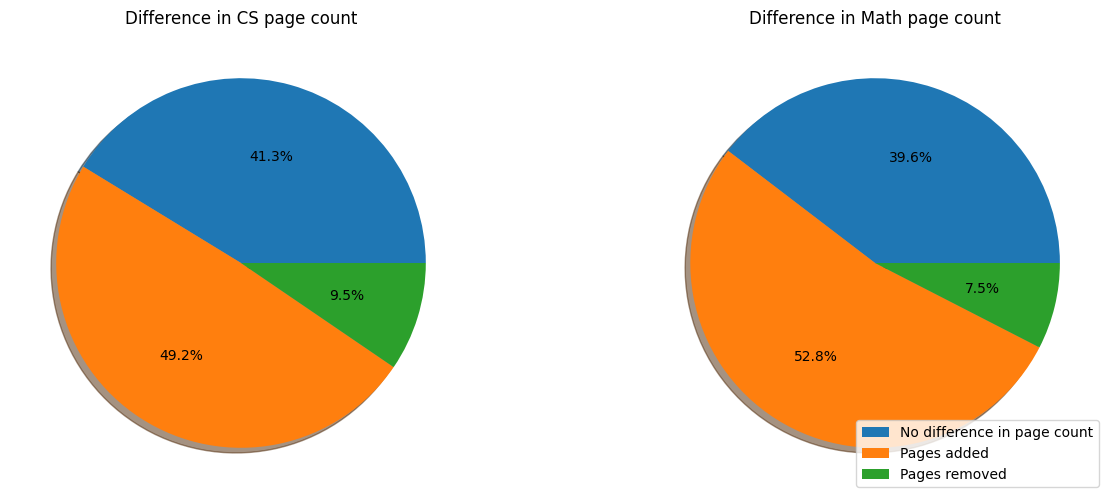

In [428]:
cs_added = cs_papers.loc[cs_papers.delta_pages > 0].id.count()
cs_subtracted = cs_papers.loc[cs_papers.delta_pages < 0].id.count()
cs_same = cs_papers.loc[cs_papers.delta_pages == 0].id.count()

math_added = math_papers.loc[math_papers.delta_pages > 0].id.count()
math_subtracted = math_papers.loc[math_papers.delta_pages < 0].id.count()
math_same = math_papers.loc[math_papers.delta_pages == 0].id.count()

cs_diffs = [cs_same, cs_added, cs_subtracted]
math_diffs = [math_same, math_added, math_subtracted]
labels = ["No difference in page count", "Pages added", "Pages removed"]

def func(pct):
    return "{:1.1f}%".format(pct)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.pie(cs_diffs, autopct=lambda pct: func(pct), shadow=True)
plt.title('Difference in CS page count')

plt.subplot(1, 2, 2)
plt.pie(math_diffs, autopct=lambda pct: func(pct), shadow=True)
plt.title('Difference in Math page count')

plt.legend(labels, loc=4)
plt.show() 


In [67]:
def get_xml_info(papers, xml_path):
    namespace = "{http://www.tei-c.org/ns/1.0}"
    analytic_path = "./{0}teiHeader/{0}fileDesc/{0}sourceDesc/{0}biblStruct/{0}analytic".format(namespace)
    figures_path = "./{0}text/{0}body/{0}figure".format(namespace)
    
    ref_cnt = []
    authors_cnt = []
    figs_cnt = []
    titles = []
    grobid = []
    for index, row in papers.iterrows():        
        if not row.is_pdf:
            grobid.append(False)
            ref_cnt.append(np.nan)
            authors_cnt.append(np.nan)
            figs_cnt.append(np.nan)
            titles.append(row.title)
            continue
        try:
            tree = etree.parse(xml_path + str(row.id).replace('/', '_') + 'v' + str(row.version) + '.tei.xml')
            root = tree.getroot()
            
            grobid.append(True)
            
            e = root.find(analytic_path)
            authors = e.findall(".//{0}persName".format(namespace))
            ref = root.find(".//{0}listBibl".format(namespace))
            figs = root.findall(figures_path)
            title = root.find("./{0}teiHeader//{0}title".format(namespace))

            if ref is not None:
                ref_cnt.append(len(ref))
            else:
                ref_cnt.append(np.nan)

            if authors is not None:
                authors_cnt.append(len(authors))
            else:
                authors_cnt.append(np.nan)

            if figs is not None:
                figs_cnt.append(len(figs))
            else:
                figs_cnt.append(np.nan)

            if title is not None and title.text is not None:
                titles.append(title.text)
            else:
                titles.append(row.title)
                
        except Exception as e:
            ref_cnt.append(np.nan)
            authors_cnt.append(np.nan)
            figs_cnt.append(np.nan)
            titles.append(row.title)
            grobid.append(False)
        
    return grobid, ref_cnt, authors_cnt, figs_cnt, titles

In [68]:
cs_papers['grobid'], cs_papers['ref_cnt'], cs_papers['authors_cnt'], cs_papers['figures_cnt'], cs_papers['title'] = get_xml_info(cs_papers, '../cs_tei/')

In [80]:
def get_delta_vals(papers):
    delta_ref_cnt = []
    delta_author_cnt = []
    delta_fig_cnt = []
    title_changed = []
    delta_pages = []
    for index, row in papers.iterrows():        
        if row.version == 1 or (not row.is_pdf) or (not row.grobid):
            delta_ref_cnt.append(np.nan)
            delta_author_cnt.append(np.nan)
            delta_fig_cnt.append(np.nan)
            title_changed.append(np.nan)
            delta_pages.append(np.nan)
            continue

        prev_ver = papers.loc[(papers.id == row.id) & (papers.version == row.version - 1)].iloc[0]
        if (not prev_ver.is_pdf) or (not prev_ver.grobid):
            delta_ref_cnt.append(np.nan)
            delta_author_cnt.append(np.nan)
            delta_fig_cnt.append(np.nan)
            title_changed.append(np.nan)
            delta_pages.append(np.nan)
            continue
            
        delta_ref_cnt.append(row.ref_cnt - prev_ver.ref_cnt)
        delta_author_cnt.append(row.authors_cnt - prev_ver.authors_cnt)
        delta_fig_cnt.append(row.figures_cnt - prev_ver.figures_cnt)
        title_changed.append(row.title != prev_ver.title)
        delta_pages.append(row.pages - prev_ver.pages)
        
    return delta_ref_cnt, delta_author_cnt, delta_fig_cnt, title_changed, delta_pages

In [71]:
cs_papers['delta_ref_cnt'], cs_papers['delta_authors_cnt'], cs_papers['delta_figures_cnt'], cs_papers['title_changed'], cs_papers["delta_pages"] = get_delta_vals(cs_papers)

In [93]:
def get_words_cnt(papers, xml_path):
    namespace = "{http://www.tei-c.org/ns/1.0}"
    
    words_cnt = []
    for index, row in papers.iterrows():        
        if (not row.is_pdf) or (not row.grobid):
            words_cnt.append(np.nan)
            continue
        
        tree = etree.parse(xml_path + str(row.id).replace('/', '_') + 'v' + str(row.version) + '.tei.xml')
        root = tree.getroot()
        curr_text = root.find("./{0}text".format(namespace))
        
        if curr_text is not None:
            text = str(etree.tostring(curr_text)).lower()
            words = re.findall('[A-Za-z]+', text)
            curr_dict = set(words)
            
            words_cnt.append(len(curr_dict))
        else:
            words_cnt.append(np.nan)
        
    return words_cnt

In [94]:
cs_papers['words_cnt'] = get_words_cnt(cs_papers, '../cs_tei/')

In [95]:
def get_text_modification(papers, xml_path):
    namespace = "{http://www.tei-c.org/ns/1.0}"
    
    added_words_cnt = []
    removed_words_cnt = []
    for index, row in papers.iterrows():        
        if row.version == 1 or (not row.is_pdf) or (not row.grobid):
            added_words_cnt.append(np.nan)
            removed_words_cnt.append(np.nan)
            continue
    
        prev_vers = papers.loc[(papers.id == row.id) & (papers.version == row.version - 1)].iloc[0]
        if (not prev_vers.is_pdf) or (not prev_vers.grobid):
            added_words_cnt.append(np.nan)
            removed_words_cnt.append(np.nan)
            continue
        
        tree = etree.parse(xml_path + str(row.id).replace('/', '_') + 'v' + str(row.version) + '.tei.xml')
        root = tree.getroot()
        curr_text = root.find("./{0}text".format(namespace))
        
        tree = etree.parse(xml_path + str(row.id).replace('/', '_') + 'v' + str(row.version - 1) + '.tei.xml')
        root = tree.getroot()
        prev_text = root.find("./{0}text".format(namespace))
        
        if curr_text is not None and prev_text is not None:
            text = str(etree.tostring(curr_text)).lower()
            words = re.findall('[A-Za-z]+', text)
            curr_dict = set(words)
            
            text = str(etree.tostring(prev_text)).lower()
            words = re.findall('[A-Za-z]+', text)
            prev_dict = set(words)
            
            added_words_cnt.append(len(curr_dict.difference(prev_dict)))
            removed_words_cnt.append(len(prev_dict.difference(curr_dict)))
        else:
            added_words_cnt.append(np.nan)
            removed_words_cnt.append(np.nan)
        
    return added_words_cnt, removed_words_cnt

In [82]:
cs_papers['added_words_cnt'], cs_papers['removed_words_cnt'] = get_delta_text_dict_len(cs_papers, '../cs_tei/')

In [96]:
cs_papers.describe()

,version,total_versions,pages,delta_pages,ref_cnt,authors_cnt,figures_cnt,delta_ref_cnt,delta_authors_cnt,delta_figures_cnt,added_words_cnt,removed_words_cnt,words_cnt
count,9600.000000,9600.000000,9051.000000,4931.000000,9003.000000,9003.000000,9003.000000,4928.000000,4928.000000,4928.000000,4928.000000,4928.000000,9003.000000
mean,1.783229,2.566458,18.487128,0.908943,38.919693,4.011218,11.387426,2.278815,0.096591,0.695211,120.441356,71.956169,1335.284239
std,0.797557,0.715171,16.252562,6.421410,27.674022,7.734728,11.063904,9.175453,2.289749,4.494369,164.962958,124.530894,466.835890
min,1.000000,2.000000,2.000000,-194.000000,0.000000,0.000000,0.000000,-176.000000,-57.000000,-71.000000,0.000000,0.000000,75.000000
25%,1.000000,2.000000,10.000000,0.000000,23.000000,2.000000,6.000000,0.000000,0.000000,0.000000,6.000000,3.000000,1040.000000
50%,2.000000,2.000000,15.000000,0.000000,34.000000,3.000000,10.000000,0.000000,0.000000,0.000000,56.000000,25.000000,1291.000000
75%,2.000000,3.000000,23.000000,2.000000,48.000000,5.000000,15.000000,4.000000,0.000000,2.000000,174.000000,87.000000,1560.000000
max,4.000000,4.000000,382.000000,190.000000,416.000000,324.000000,521.000000,179.000000,84.000000,118.000000,1546.000000,2466.000000,5395.000000
